In [13]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/content/heart.csv')

# Preprocess the data
data.fillna(method='ffill', inplace=True)  # Fill missing values

# Select relevant features for anomaly detection
features = data[['age', 'trtbps', 'chol']]  # Adjust based on your features

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Train the Isolation Forest model
model = IsolationForest(contamination=0.05)  # Adjust contamination based on your needs
model.fit(scaled_features)

# Predict anomalies
data['anomaly'] = model.predict(scaled_features)
data['anomaly'] = data['anomaly'].map({1: 'Normal', -1: 'Anomaly'})

# Check the distribution of anomalies
print(data['anomaly'].value_counts())

# Display the results
print(data.head(20))  # Show more rows for better visibility


<ipython-input-13-7970942319f3>:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Fill missing values


anomaly
Normal     287
Anomaly     16
Name: count, dtype: int64
    age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0    63    1   3     145   233    1        0       150     0      2.3    0   
1    37    1   2     130   250    0        1       187     0      3.5    0   
2    41    0   1     130   204    0        0       172     0      1.4    2   
3    56    1   1     120   236    0        1       178     0      0.8    2   
4    57    0   0     120   354    0        1       163     1      0.6    2   
5    57    1   0     140   192    0        1       148     0      0.4    1   
6    56    0   1     140   294    0        0       153     0      1.3    1   
7    44    1   1     120   263    0        1       173     0      0.0    2   
8    52    1   2     172   199    1        1       162     0      0.5    2   
9    57    1   2     150   168    0        1       174     0      1.6    2   
10   54    1   0     140   239    0        1       160     0      1.2    2   


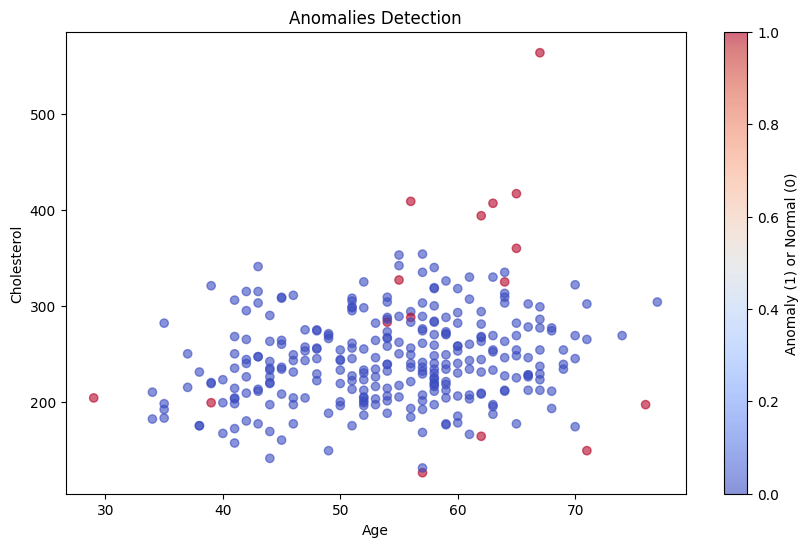

In [14]:
import matplotlib.pyplot as plt

# Plot features with anomalies highlighted
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['chol'], c=data['anomaly'].apply(lambda x: 1 if x == 'Anomaly' else 0), cmap='coolwarm', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Anomalies Detection')
plt.colorbar(label='Anomaly (1) or Normal (0)')
plt.show()
